<a href="https://colab.research.google.com/github/Shailamkumar/Optima2k18/blob/master/Emotion_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import os
import zipfile
import urllib
urllib.request.urlretrieve("https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip",
                           filename="/tmp/happy-or-sad.zip")

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

In [0]:
from tf.keras.preprocessing.image import load_img
from tf.keras.models import load_model
from tf.keras.preprocessing.image import img_to_array

In [0]:
# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):
         # Your Code
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')>0.98):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True

    callbacks = myCallback()
    
    # This Code Block should Define and Compile the Model
    model = tf.keras.models.Sequential([
        # Your Code Here
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),    
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),    
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),    
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
        

    # This code block should create an instance of an ImageDataGenerator called train_datagen 
    # And a train_generator by calling train_datagen.flow_from_directory

    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale=1/255)

    train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s/',
        target_size=(150, 150), 
        batch_size=128,
        class_mode='binary')
    # Expected output: 'Found 80 images belonging to 2 classes'

    # This code block should call model.fit_generator and train for
    # a number of epochs.
    # model fitting
    history = model.fit_generator(
          train_generator,
          steps_per_epoch=8,  
          epochs=15,callbacks=[callbacks])
    # model fitting
    model.save("final.h5")    
    return history.history['acc'][-1]

In [0]:
train_happy_sad_model()

Found 80 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 14s 2s/step - loss: 1.1221 - acc: 0.5375
Epoch 2/15
8/8 [==============================] - 13s 2s/step - loss: 0.4679 - acc: 0.7734
Epoch 3/15
8/8 [==============================] - 13s 2s/step - loss: 0.1899 - acc: 0.9406
Epoch 4/15
8/8 [==============================] - 13s 2s/step - loss: 0.0721 - acc: 0.9750
Epoch 5/15
7/8 [=========================>....] - ETA: 1s - loss: 0.0365 - acc: 0.9857
Reached 99.9% accuracy so cancelling training!
8/8 [==============================] - 13s 2s/step - loss: 0.0343 - acc: 0.9875


0.9875

In [0]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

In [0]:
im = plt.imread("happy1-10.png")
im.shape


(150, 150, 4)

In [0]:
def plti(im, h=5, **args):
  y = im.shape[0]
  x = im.shape[1]
  w = (y/x) * h
  plt.figure(figsize = (w,h))
  plt.imshow(im, interpolation = "none", **args) 
  plt.axis('off')
plti(im)
model = tf.keras.models.load_model('final.h5')
im = im.reshape(1, 150, 150, 3)
result = model.predict(im)
print(result[0][0]) 

In [0]:
img = tf.keras.preprocessing.image.load_img('sad1-10.png', target_size=(150, 150))
model = tf.keras.models.load_model('final.h5')
img = tf.keras.preprocessing.image.img_to_array(img)
img = img.reshape(1,150, 150, 3)

result = model.predict(img)
print(result[0][0]) 

1.0


In [0]:
im1 = plt.imread("sad1-10.png")
im1.shape

(150, 150, 4)

Sad


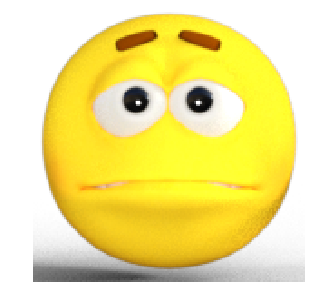

In [0]:
def pltii(im, h=5, **args):
  y = im.shape[0]
  x = im.shape[1]
  w = (y/x) * h
  plt.figure(figsize = (w,h))
  plt.imshow(im, interpolation = "none", **args)   
  plt.axis('off')
pltii(im1)